# Zusammenfassung
Dieses Notebook analysiert die Ähnlichkeit von Wahlprogrammen politischer Parteien zu den Europawahlen 2019 basierend auf tf-idf. Dazu werden mehrere Schritte durchgeführt:<br><br>
**Data Preprocessing**<br>
Die Programme werden eingelesen und der Text weiterverarbeitet. Dabei findet eine Kleinschreibung, die Entfernung von Stoppwörtern und Sonderzeichen und die Tokenisierung statt.
<br><br>
**CountVectorizer**<br>
Um die Dokumente zu untersuchen wird im ersten Schritte eine deskriptive Analyse anhand der Wordhäufigkeiten durchgeführt.
<br><br>
**TF-IDF**<br>
Mithilfe von tf-idf werden die Wortvorkommen in den Dokumenten gewichtet und in vektorisierter Form bereitsgestellt.
<br><br>
**Cosine Similarity**<br>
Die Cosine Similarity ist eine Kennzahl um die Ähnlichkeit von Vektoren darzustellen. Dabei werden bei der Cosine Similarity die Winkel zwischen den Vektoren berechnet.


# Import Modules

In [1]:
from os import listdir #gets filenames from Folder
import PyPDF2 #imports pdf

import pandas as pd #stores data as dataframe
import numpy as np # mathematical calculation, underlying pandas

import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Out-of-the box viz, building on plt
sns.set_style("darkgrid") #Set default seaborn style

#NLTK
from nltk.stem.snowball import GermanStemmer #German Stemmer
stem=GermanStemmer() # Initialistes stemmer
from nltk.tokenize import word_tokenize #Tokenizes Text
from nltk.corpus import stopwords #importing stopwords without meaning like "und", "wenn" ...

import re #Regular Expressions, for replacing patterns 

from nltk.corpus import stopwords
stop_words = stopwords.words('german')
len(stop_words)

232

# Import Files
The analysis includes elections programs from ten german political parties. They were downloaded from the respective websites and are stored as *.pdf.

## Create Dictionary
The programs are loaded and saved as a strings. These strings later get

In [2]:
#Fetches file list
folder = "2019"
files = listdir(folder)

#Creates Dictionary from files
programms = {}

for each in files:
    docs=""
    with open(folder+"/"+each, mode='rb') as f:
        reader = PyPDF2.PdfFileReader(f)
        for page in reader.pages:
            text = page.extractText()
            docs = docs+ " | " +text
        print(each + "- done!")
    programms[folder + each] = docs

afd.pdf- done!
cdu.pdf- done!
familie.pdf- done!


fdp.pdf- done!


grüne.pdf- done!


linke.pdf- done!
mensch_umwelt.pdf- done!


npd.pdf- done!
oedp.pdf- done!


spd.pdf- done!


In [3]:
names = [x.replace(".pdf","") for x in files]

In [31]:
names[6]="m_umw"

# Data Preprocessing

In [5]:
#Lowercase, Remove numbers, special characters and tokenize
special_characters = '[$&+,:;=?@#|<>.\-^*()%!/ˇ‘]'
stop_words = stopwords.words('german')

for each in programms:
    programms[each] = programms[each].lower()
    programms[each] = re.sub(special_characters,'', programms[each])
    programms[each] = re.sub('[0-9]','', programms[each])
    programms[each] = word_tokenize(programms[each])
    programms[each] = [word for word in programms[each] if not word in stop_words]
    
#Stem Words
programms_stemmed = {}

for each in programms:
    programms_stemmed[each] = [stem.stem(word) for word in programms[each]]

# Count Vectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

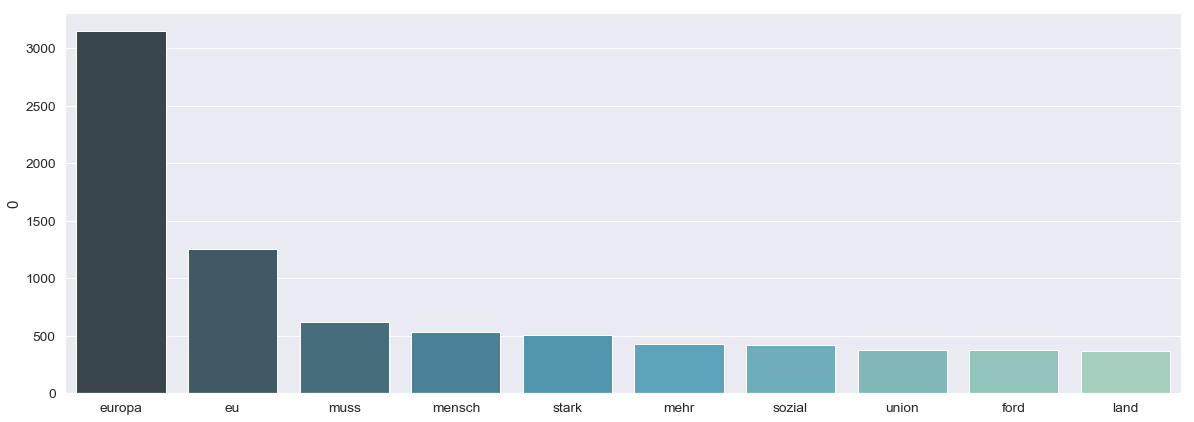

In [20]:
# Create single string from words
full = ""
for doc in programms_stemmed:
    full = full + str(programms_stemmed[doc])
full = [full]

# Initialize counts
count = CountVectorizer()
X = count.fit_transform(full)

# Build DataFrame and plot top 10
total_counts = pd.DataFrame(data = X.T.todense(),index=count.get_feature_names()).sort_values(by = 0, ascending=False)
words = total_counts.head(10)
sns.set(font_scale=1.25)
plt.figure(figsize=(20,7))
sns.barplot(x=words.index.values, y=words[0], palette="GnBu_d")


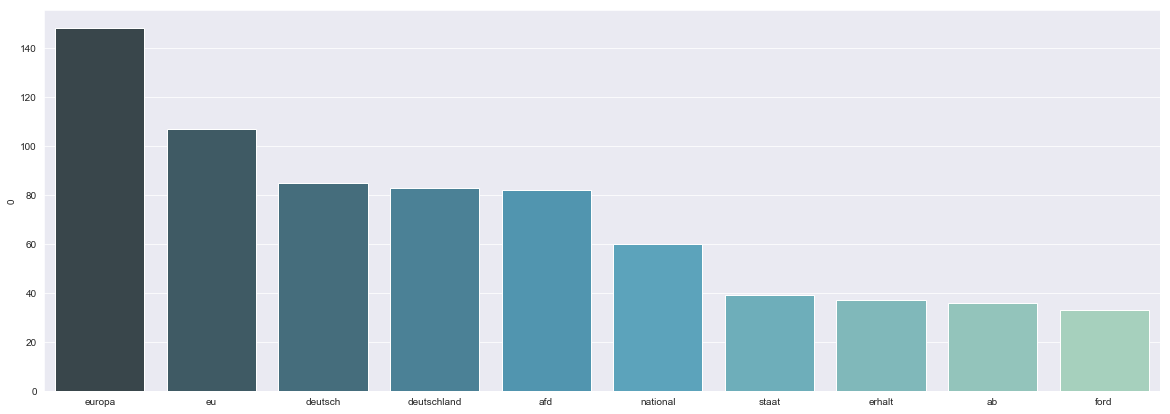

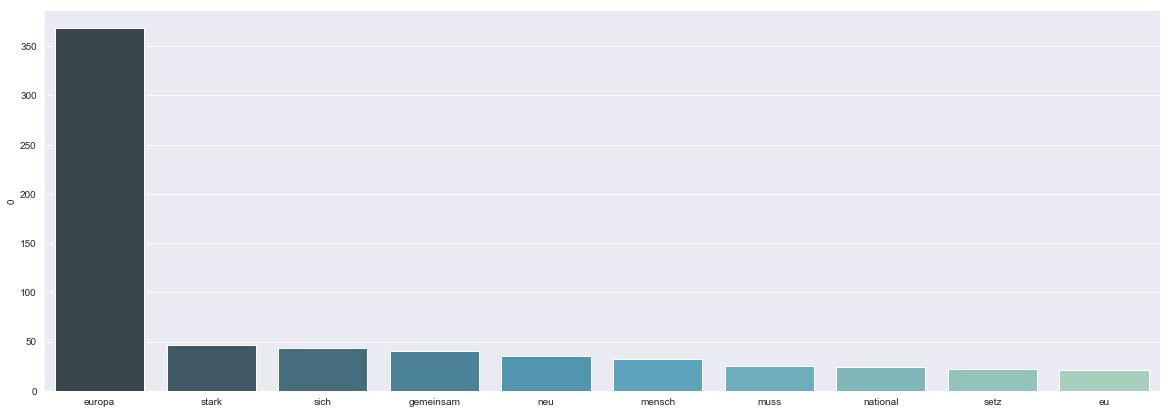

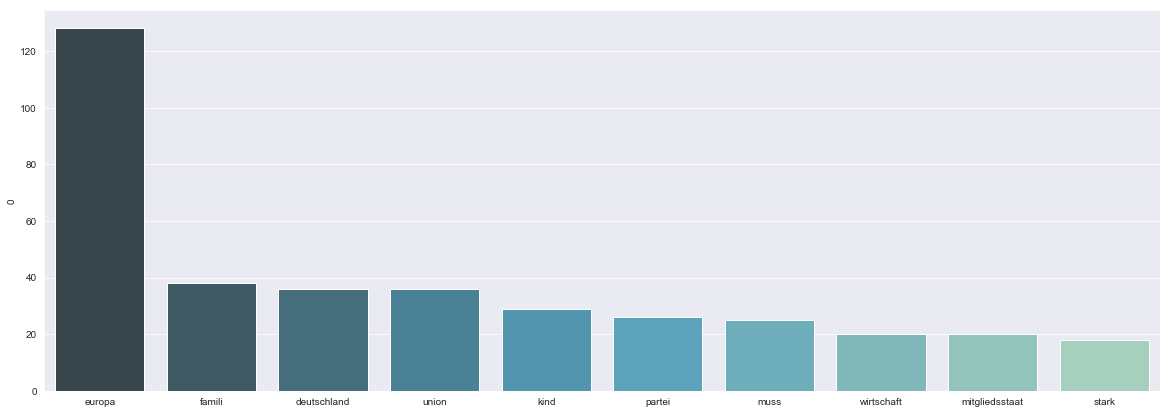

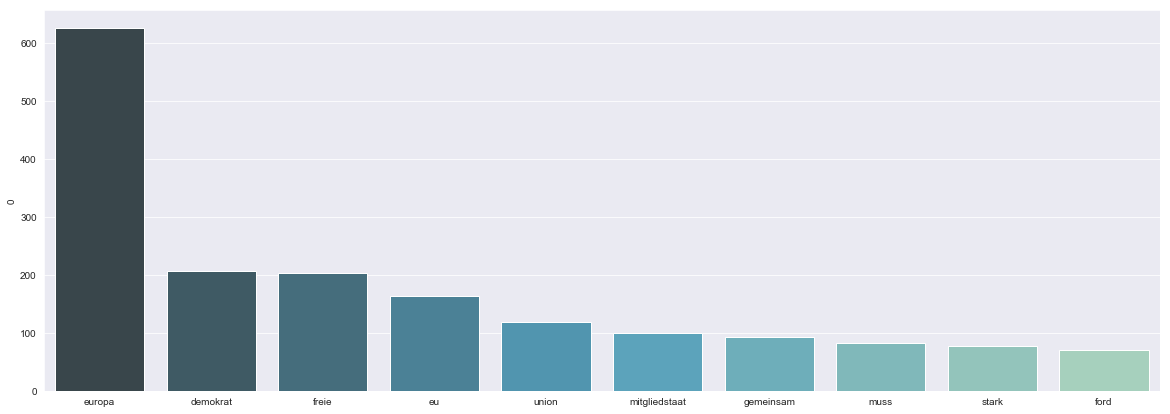

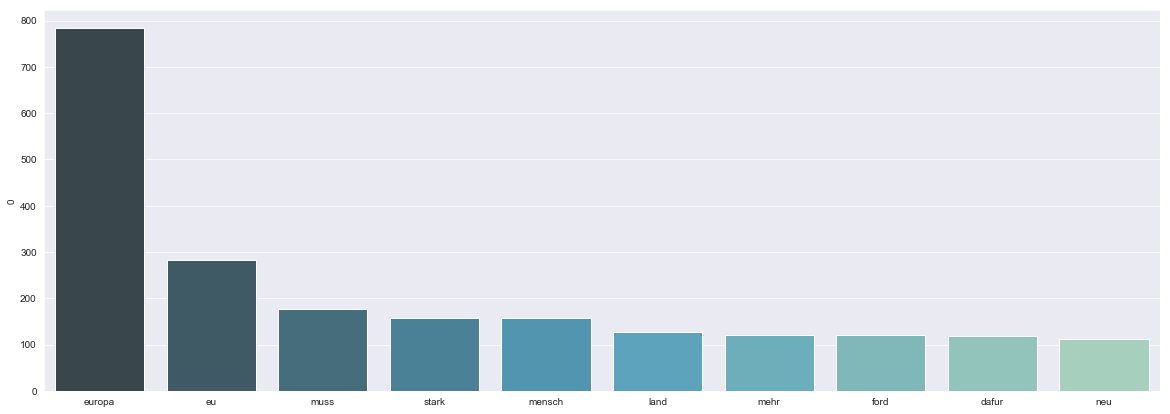

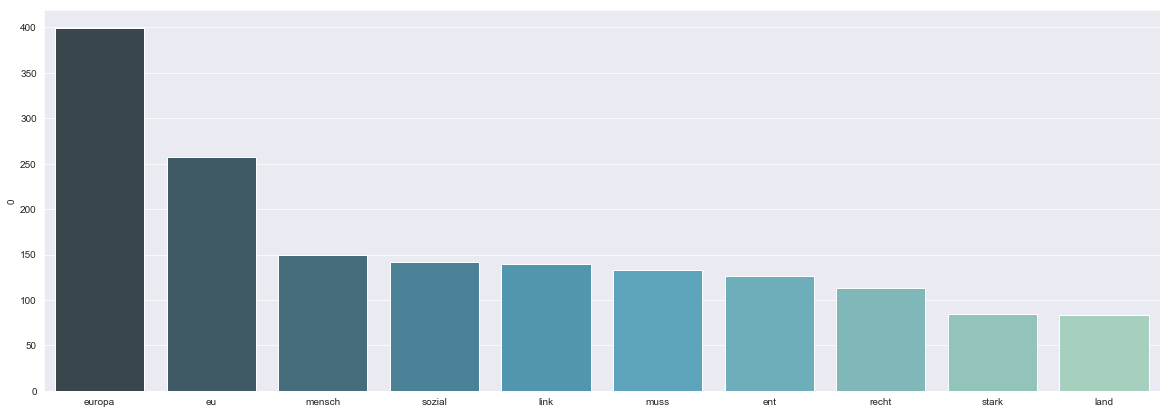

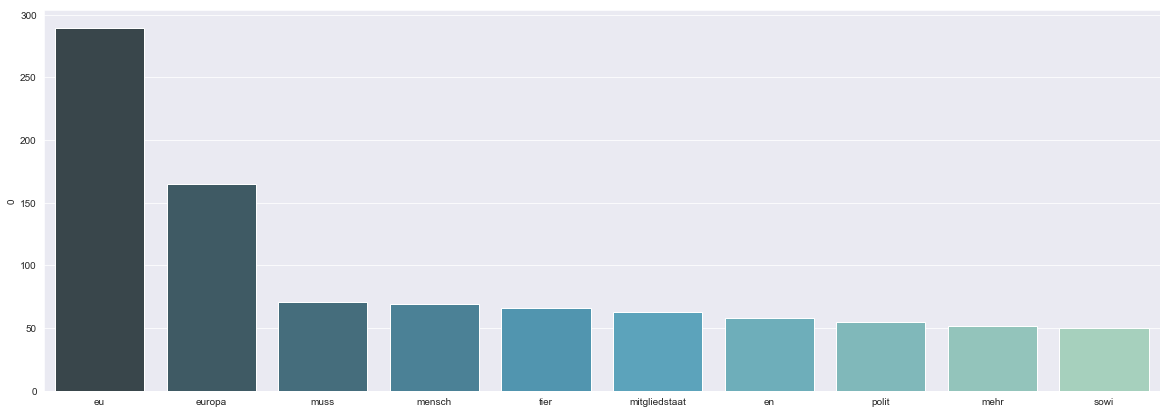

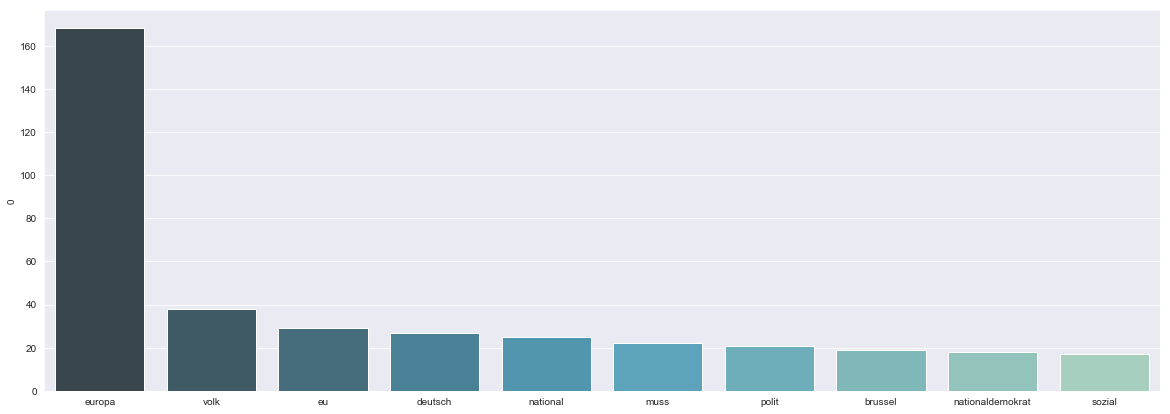

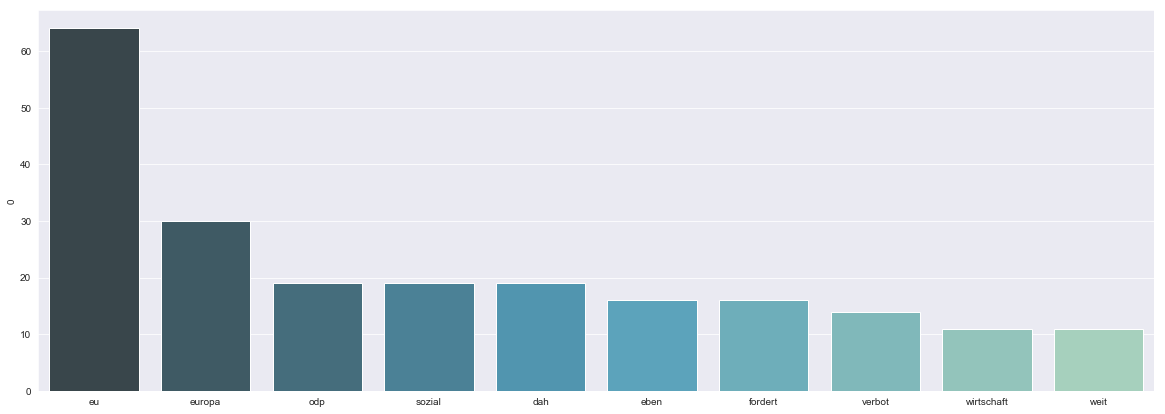

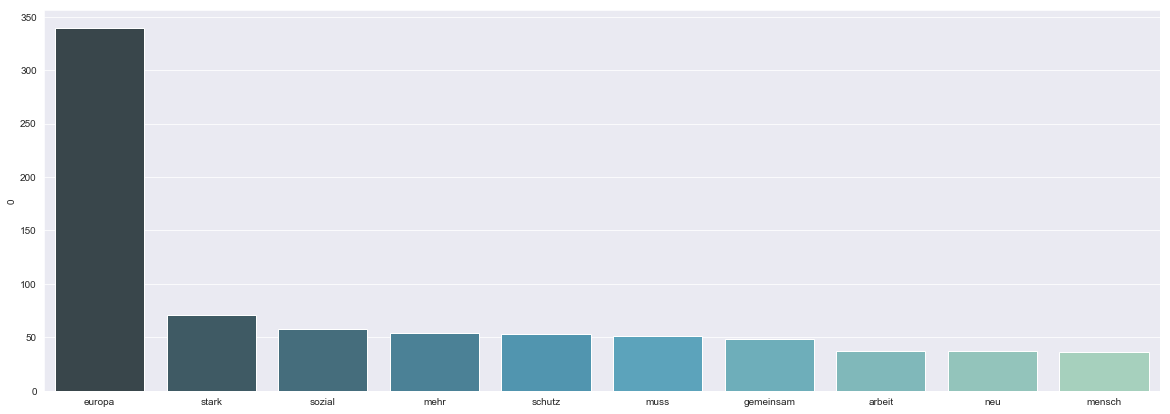

In [8]:
# Create list of strings
lis = []

for doc in programms:
    lis.append(str(programms_stemmed[doc]))

#Plot top20 words for each party
for each in lis:
    each = [each]
    count = CountVectorizer()
    X = count.fit_transform(each)
    words = pd.DataFrame(data=X.T.todense(),index=count.get_feature_names()).sort_values(by=0, ascending=False).head(10)
    
    plt.figure(figsize=(20,7))
    sns.barplot(x=words.index.values, y=words[0], palette="GnBu_d")
    

# TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(lowercase=False)
res = tfidf.fit_transform(lis)

## Häufigste Worte und TF-IDF per Partei

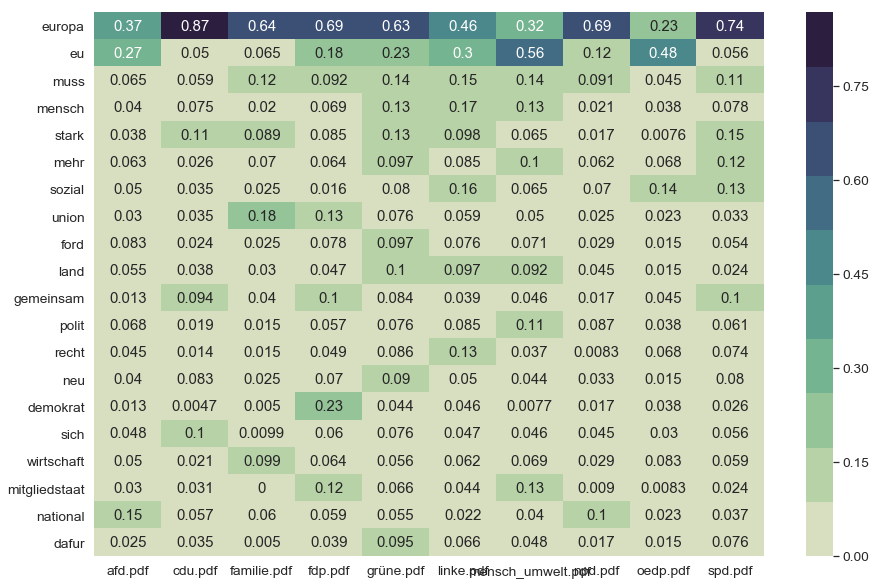

In [21]:
# Create DataFrame with top words
df=pd.DataFrame(data = res.T.toarray(), index = tfidf.get_feature_names())
df=pd.merge(df, total_counts, left_index = True, right_index = True)
df_head=df.sort_values("0_y", ascending = False).head(20).drop(columns = ["0_y"])

# Create Plot
plt.figure(figsize=(15,10))
g=sns.heatmap(df_head, annot = True, cmap = sns.cubehelix_palette(10, start = .5, rot = -.75))
g=g.set(xticklabels=files)

.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated [ipykernel_launcher.py:4]


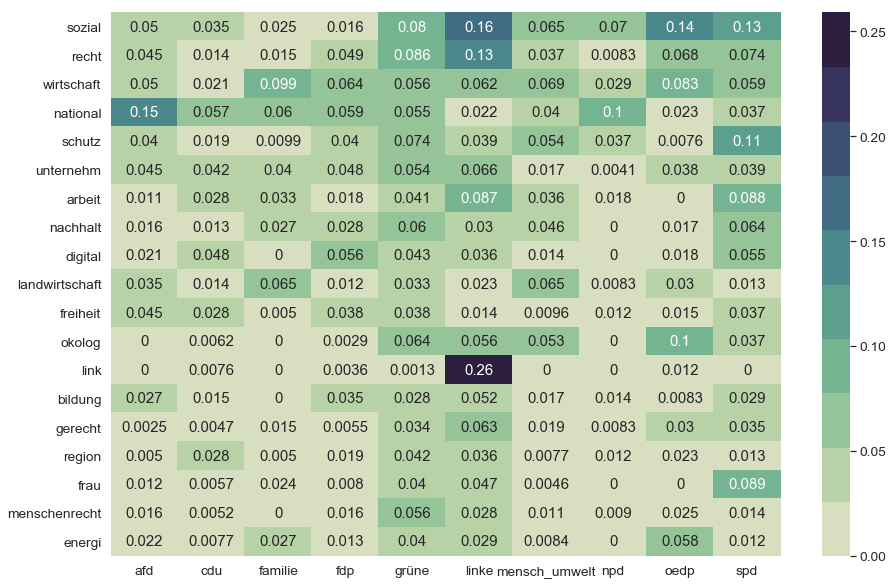

In [23]:
# Create DataFrame with top words
df_manual=df.sort_values("0_y", ascending=False).head(100).drop(columns=["0_y"])
selected = ["sozial", "recht", "wirtschaft","national","schutz","unternehm","arbeit","nachhalt","digital", "landwirtschaft", "freiheit","okolog", "link","bildung","gerecht","region","frau","menschenrecht","energi"]
df_manual=df_manual.ix[selected]

#Create Plot
plt.figure(figsize=(15,10))
g=sns.heatmap(df_manual, annot=True, cmap=sns.cubehelix_palette(10, start=.5, rot=-.75))
g=g.set(xticklabels=names)

# Cosine Similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

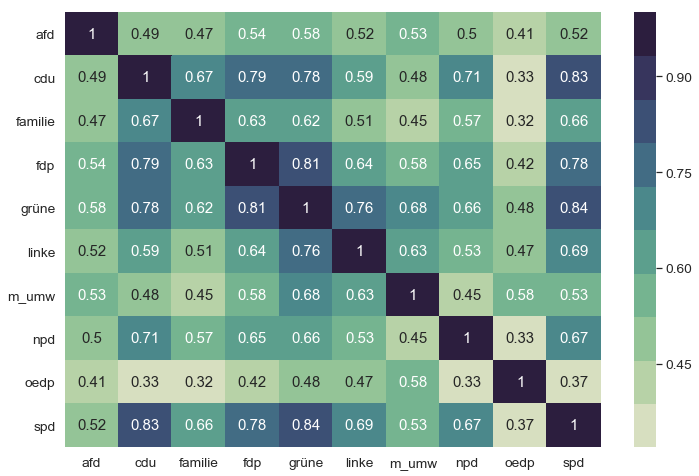

In [41]:
length=len(files)
matrix = np.empty([length,length])

for col in range(length):
    for row in range(length): 
        cosine_similarities = cosine_similarity(res[col], res[row]).flatten()
        matrix[col][row]=cosine_similarities
        
plt.figure(figsize=(12,8))
g=sns.heatmap(matrix, cmap=sns.cubehelix_palette(10, start=.5, rot=-.75), annot=True)
g=g.set(xticklabels=names, yticklabels=names)
plt.yticks(rotation=0)

### Visualize T-Sne

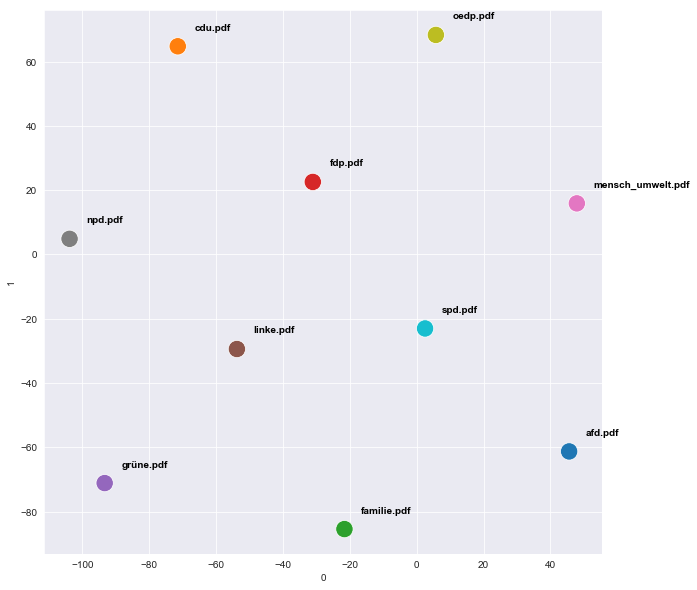

In [192]:
df_t = df.drop("0_y", axis=1).transpose()
tsne_obj= tsne.fit_transform(df_t)
df_tsne=pd.DataFrame(data=tsne_obj, index=files)

plt.figure(figsize=(10,10))
g= sns.scatterplot(x=0, y=1,data=df_tsne, hue=df_tsne.index.values, s=300, legend=False,)

for line in range(0,df_tsne.shape[0]):
     g.text(df_tsne[0][line]+5, df_tsne[1][line]+5, df_tsne.index.values[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

## Search for Terms

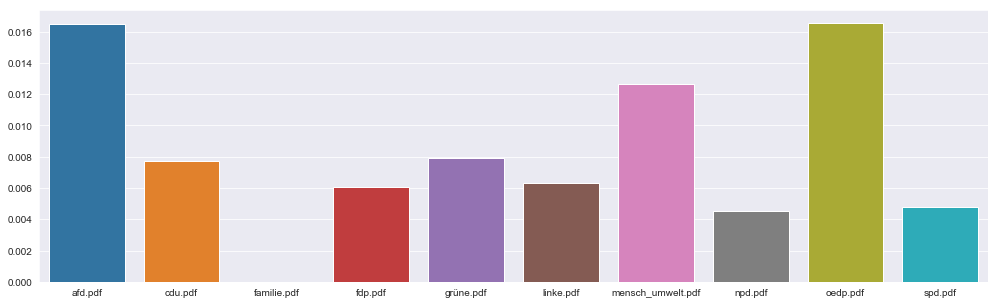

In [193]:
search_term = "asyl"
search_term = stem.stem(search_term.lower())
search_term = word_tokenize(search_term)
#search_term = [search_term]

query = tfidf.transform(search_term)

y= []

for row in range(length): 
    y.append(cosine_similarity(query, res[row]).flatten()[0])
    
plt.figure(figsize=(17,5))
sns.barplot(x=files, y=y)

In [ ]:
>>> model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
>>> model.save("word2vec.model")